# **Frist Project**

# 1. Data Loading and Initial Exploration






In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Reviews = pd.read_csv('/content/drive/MyDrive/week3/Reviews.csv', encoding='latin1')
Listings = pd.read_csv('/content/drive/MyDrive/week3/Listings.csv', encoding='latin1')

<ipython-input-3-b61f7bab492e>:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Listings = pd.read_csv('/content/drive/MyDrive/week3/Listings.csv', encoding='latin1')


In [4]:
merged_df = pd.merge(Reviews, Listings, on='listing_id')
print(f'The data contains {len(merged_df)} rows and {len(merged_df.columns)} columns')


The data contains 5373143 rows and 36 columns


In [5]:
merged_df.head()

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,11798,330265172,2018-09-30,11863072,Loft very charming in Paris,44444,2009-10-08,"Paris, Ile-de-France, France",NaN,NaN,...,2,20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,11798,437228860,2019-04-14,3153099,Loft very charming in Paris,44444,2009-10-08,"Paris, Ile-de-France, France",NaN,NaN,...,2,20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,11798,274915772,2018-06-10,13021254,Loft very charming in Paris,44444,2009-10-08,"Paris, Ile-de-France, France",NaN,NaN,...,2,20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,11798,284327934,2018-07-01,74131694,Loft very charming in Paris,44444,2009-10-08,"Paris, Ile-de-France, France",NaN,NaN,...,2,20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,11798,223467265,2018-01-01,39665778,Loft very charming in Paris,44444,2009-10-08,"Paris, Ile-de-France, France",NaN,NaN,...,2,20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 36 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   listing_id                   int64  
 1   review_id                    int64  
 2   date                         object 
 3   reviewer_id                  int64  
 4   name                         object 
 5   host_id                      int64  
 6   host_since                   object 
 7   host_location                object 
 8   host_response_time           object 
 9   host_response_rate           float64
 10  host_acceptance_rate         float64
 11  host_is_superhost            object 
 12  host_total_listings_count    float64
 13  host_has_profile_pic         object 
 14  host_identity_verified       object 
 15  neighbourhood                object 
 16  district                     object 
 17  city                         object 
 18  latitude                     float64
 19  

In [7]:
merged_df.isnull().sum()

listing_id                           0
review_id                            0
date                                 0
reviewer_id                          0
name                               333
host_id                              0
host_since                        3939
host_location                     7910
host_response_time             1475633
host_response_rate             1475633
host_acceptance_rate            748437
host_is_superhost                 3939
host_total_listings_count         3939
host_has_profile_pic              3939
host_identity_verified            3939
neighbourhood                        0
district                       4525416
city                                 0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bedrooms                        541413
amenities                            0
price                    

# **2. Data Cleaning**

In [8]:
# Add New Column

# Extract the month name from the 'date' column
merged_df['month'] = pd.to_datetime(merged_df['date']).dt.month_name()
monthly_visits = merged_df.groupby('month')['review_id'].count()
monthly_visits

month
April        375740
August       441171
December     445717
February     408320
January      496802
July         456495
June         426258
March        401732
May          398185
November     458601
October      552877
September    511245
Name: review_id, dtype: int64

In [9]:
# create a fcuntion to find and display NAs
def count_NAs(dfna, perc):
    NaList = []
    numOfRows = len(dfna)
    for i in dfna.columns:
        numOfNAs = dfna[i].isna().sum()
        print(f'{i:<30}, Rows: {numOfRows:>5}, NAs: {numOfNAs:<25}, precentage: {round(numOfNAs/numOfRows * 100.00,2)}')
        if ((numOfNAs/numOfRows) * 100.000) >= perc:
           NaList.append(i)
    print(f'columns with NAs over {perc}%: {NaList}')
    return NaList
# Display NAs
cutoff = 40
NAs = count_NAs(merged_df, cutoff)
print(f"Total with NAs over {cutoff}% column number :",len(NAs))

listing_id                    , Rows: 5373143, NAs: 0                        , precentage: 0.0
review_id                     , Rows: 5373143, NAs: 0                        , precentage: 0.0
date                          , Rows: 5373143, NAs: 0                        , precentage: 0.0
reviewer_id                   , Rows: 5373143, NAs: 0                        , precentage: 0.0
name                          , Rows: 5373143, NAs: 333                      , precentage: 0.01
host_id                       , Rows: 5373143, NAs: 0                        , precentage: 0.0
host_since                    , Rows: 5373143, NAs: 3939                     , precentage: 0.07
host_location                 , Rows: 5373143, NAs: 7910                     , precentage: 0.15
host_response_time            , Rows: 5373143, NAs: 1475633                  , precentage: 27.46
host_response_rate            , Rows: 5373143, NAs: 1475633                  , precentage: 27.46
host_acceptance_rate          , Rows: 53731

In [10]:
merged_df.duplicated().sum()

0

In [11]:
merged_df.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'district', 'city',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'month'],
      dtype='object')

In [12]:
merged_df.drop(NAs, axis = 1, inplace = True) # removing columns with NAs columns over 40%
merged_df.drop(['latitude','longitude'],  axis = 1, inplace = True) # Dropping columns not useful for our analysis
merged_df.dropna(inplace=True) # Drop rows that contains NAs, Note that now its a relatively small number of rows since we dropped the columns with large percentage of Nulls
print(f"The length after dropping nas: {len(merged_df)}")

The length after dropping nas: 3386529


In [13]:
merged_df.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'month'],
      dtype='object')

In [14]:
merged_df.head()

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,month
582,162163,329980859,2018-09-30,94026758,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.0,...,35,86.0,9.0,9.0,10.0,10.0,10.0,9.0,f,September
583,162163,365234240,2019-01-01,97519756,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.0,...,35,86.0,9.0,9.0,10.0,10.0,10.0,9.0,f,January
584,162163,444717066,2019-04-28,81491487,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.0,...,35,86.0,9.0,9.0,10.0,10.0,10.0,9.0,f,April
585,162163,482904229,2019-07-07,246285395,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.0,...,35,86.0,9.0,9.0,10.0,10.0,10.0,9.0,f,July
586,162163,274916628,2018-06-10,133689393,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.0,...,35,86.0,9.0,9.0,10.0,10.0,10.0,9.0,f,June


# **3.Exploratory Data Analysis**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
sample_df = merged_df.sample(frac=0.0002)

In [17]:
sample_df.head(4)

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,month
822348,30437635,434624103,2019-04-08,212386356,Ã¥Â·Â´Ã©Â»Å½Ã¤Â½Â³Ã§Â¾Å½Ã¦ââ¦Ã©Â¦â 8,223504492,2018-10-31,FR,within an hour,1.0,...,30,94.0,10.0,9.0,10.0,9.0,10.0,9.0,t,April
3996499,16974667,314537801,2018-08-27,199876977,Cozy Modern Home With Free parking,89272740,2016-08-11,"Sydney, New South Wales, Australia",within an hour,1.0,...,1125,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,August
3213216,6438273,487231882,2019-07-14,25467082,Cosy timber cottage near transport,33610379,2015-05-17,"New South Wales, Australia",within an hour,1.0,...,1125,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,July
542274,2009265,51025722,2015-10-17,23906237,"HEART OF PARIS = MONTORGUEIL Area. MODERN, BRI...",4387362,2012-12-12,"Paris, Ile-de-France, France",within an hour,1.0,...,1124,97.0,10.0,10.0,10.0,10.0,10.0,9.0,f,October


In [18]:
mean_price= sample_df['price'].mean()
mean_price

443.25110782865585

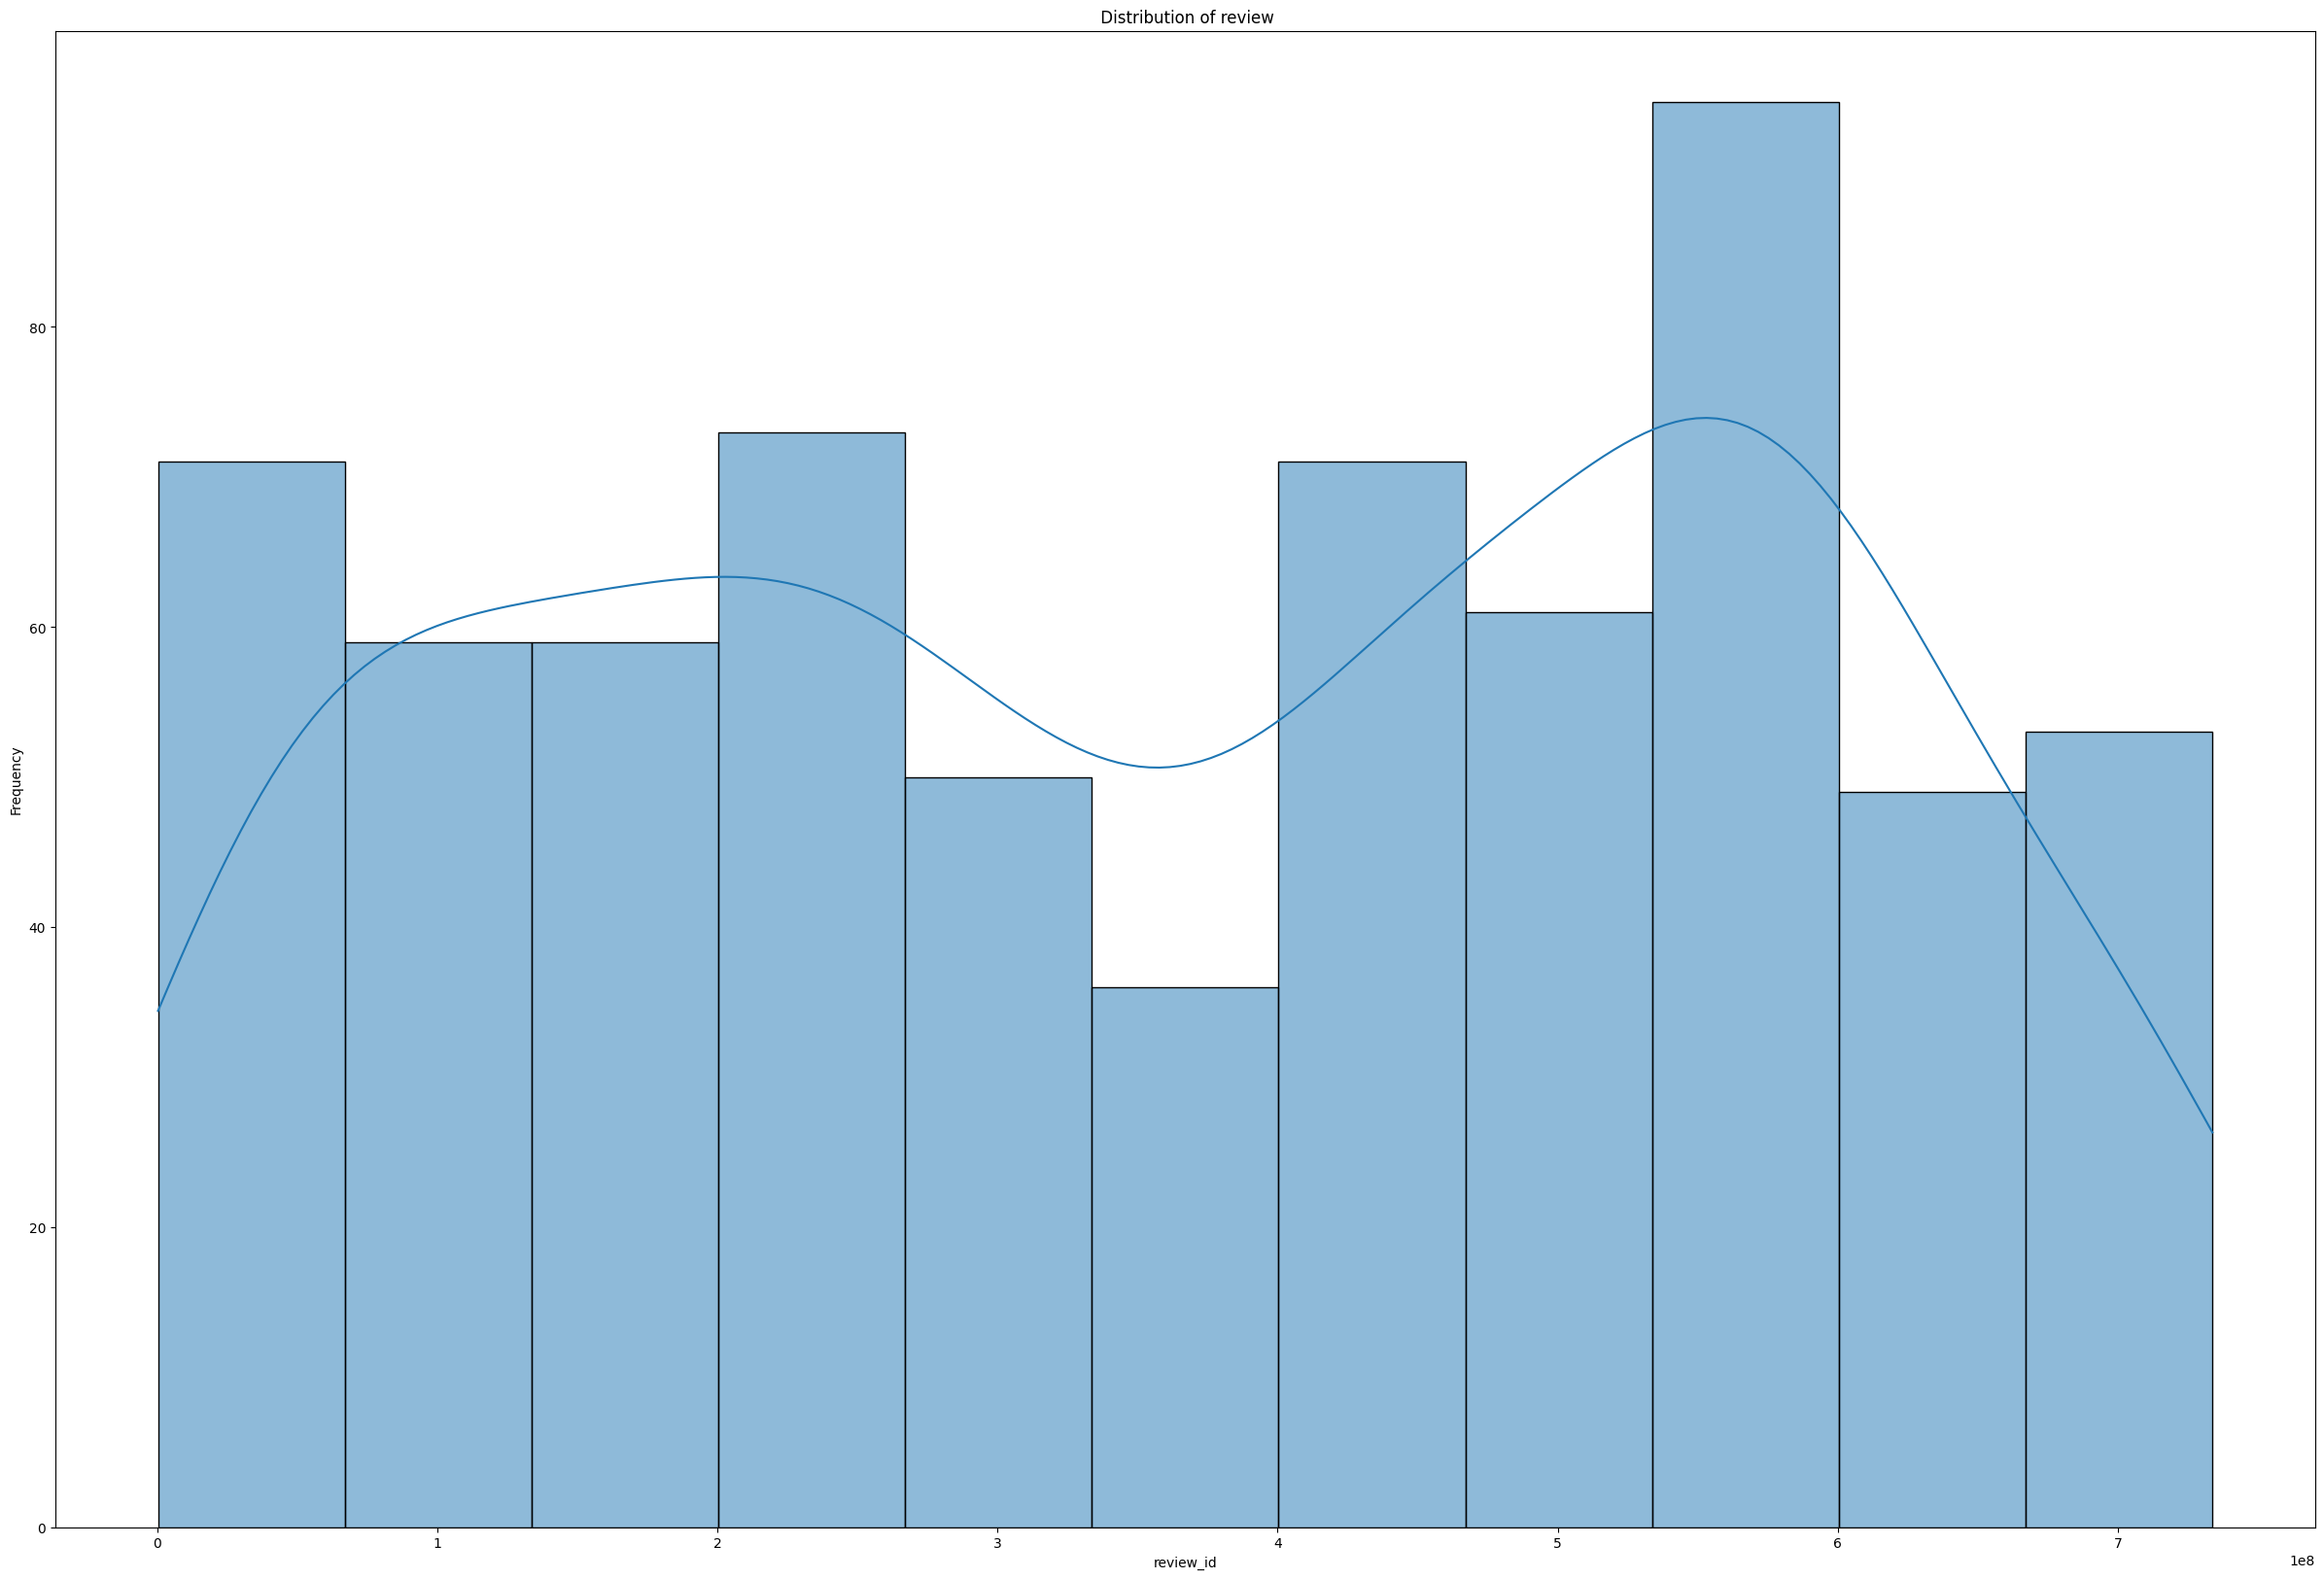

In [19]:
plt.figure(figsize=(30,20))
sns.histplot(sample_df['review_id'],kde=True)
plt.xlabel('review_id')
plt.ylabel('Frequency')
plt.title(' Distribution of review')
plt.show()


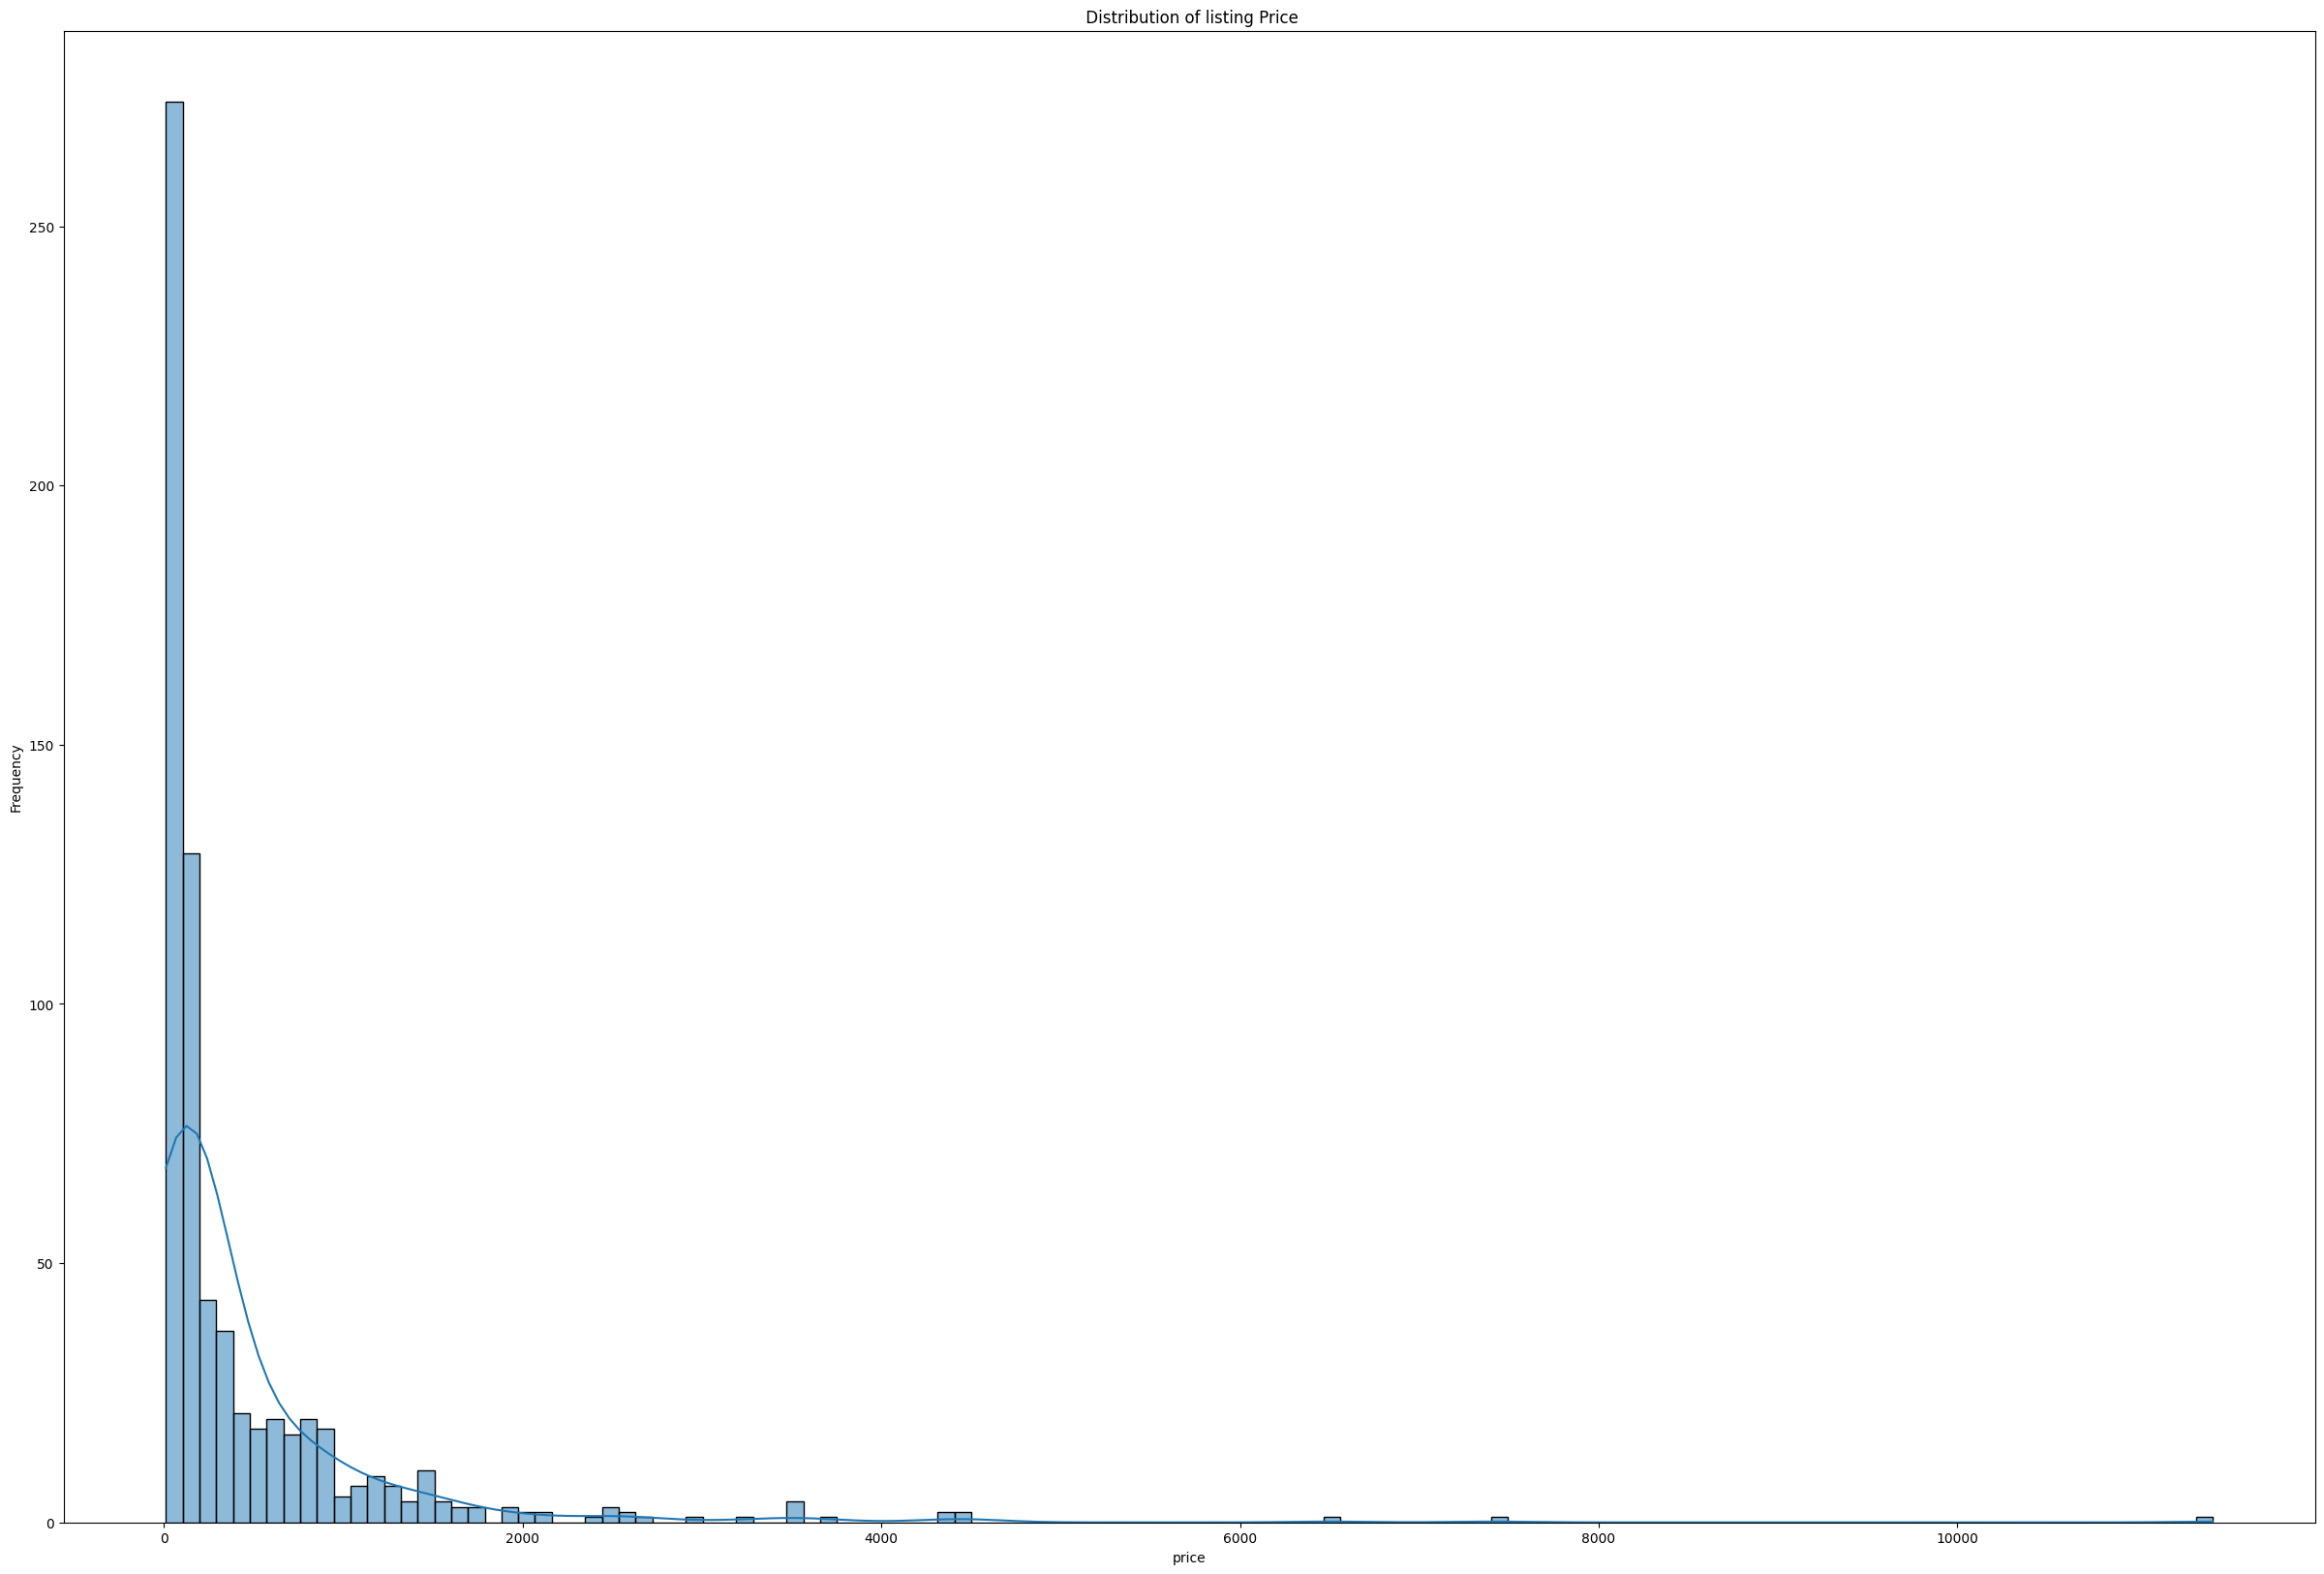

In [20]:
plt.figure(figsize=(30,20))
sns.histplot(sample_df['price'],kde=True)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title(' Distribution of listing Price')
plt.show()
#plt.savefig('price_dist.png')

In [21]:
# Here a new column has been added and its data visualized

Top_property_type = merged_df['property_type'].value_counts().head(10).index.tolist()

merged_df['Top Property'] = merged_df['property_type'].apply(lambda x:x if x in Top_property_type else 'Other')

In [22]:
merged_df['Top Property'].unique()

array(['Entire apartment', 'Other', 'Entire townhouse',
       'Private room in house', 'Entire house', 'Entire loft',
       'Private room in apartment', 'Entire condominium',
       'Private room in townhouse', 'Room in boutique hotel',
       'Entire guest suite'], dtype=object)

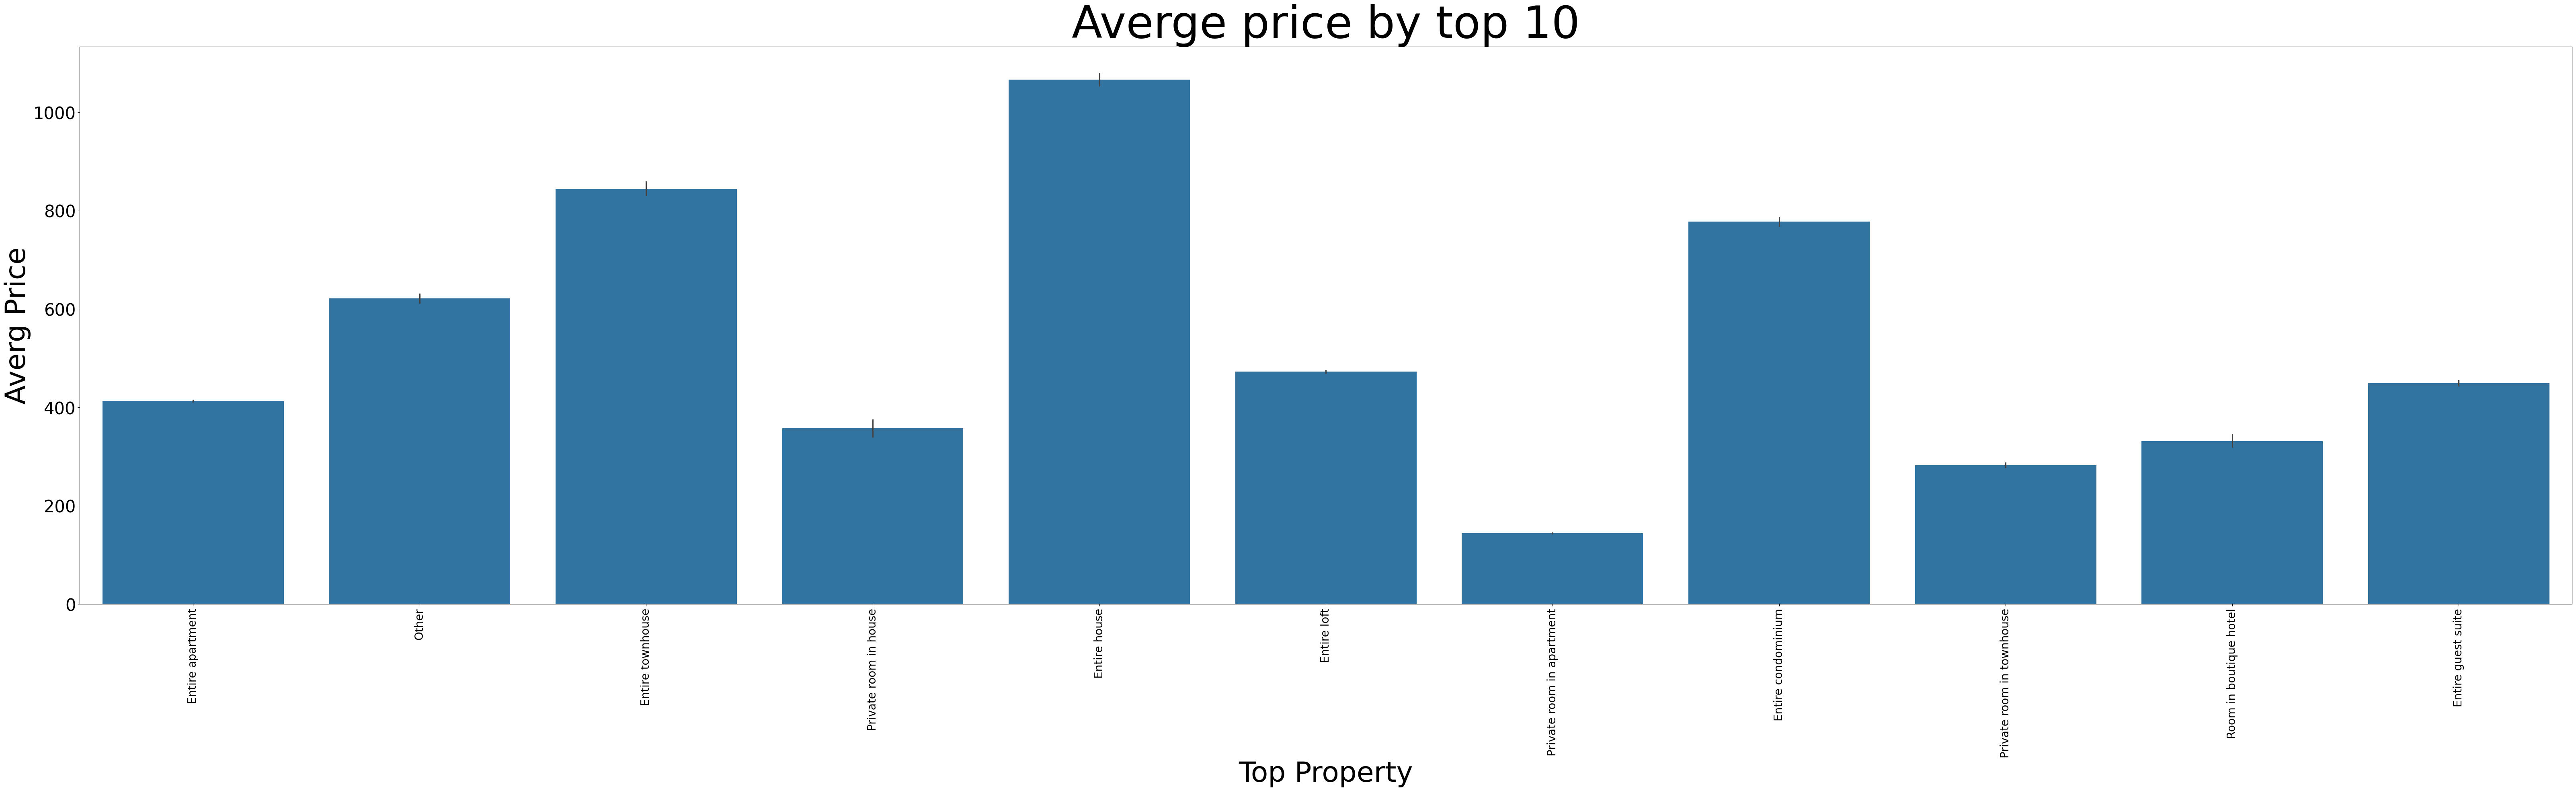

In [23]:
plt.figure(figsize=(80,18))
sns.barplot(data=merged_df , x='Top Property', y='price')
plt.title('Averge price by top 10',fontsize=80)
plt.xlabel('Top Property', fontsize=50)
plt.ylabel('Averg Price', fontsize=50)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=30)
plt.savefig('Averge price.png')


In [24]:
# Here a new column has been added and its data visualized

Top_neighbourhood = merged_df['neighbourhood'].value_counts().head(5).index.tolist()

merged_df['Top neighbourhood'] = merged_df['neighbourhood'].apply(lambda x:x if x in Top_neighbourhood else 'Other')
merged_df.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'month', 'Top Property', 'Top neighbourhood'],
      dtype='object')

In [25]:
merged_df['Top neighbourhood'].unique()

array(['Other', 'Cuauhtemoc', 'Copacabana', 'Sydney', 'Beyoglu',
       'I Centro Storico'], dtype=object)

In [26]:
average_neighbourhood = merged_df.groupby('Top neighbourhood')['price'].mean().sort_values()
average_neighbourhood

Top neighbourhood
I Centro Storico      89.916419
Sydney               174.401330
Copacabana           257.073578
Beyoglu              385.501798
Other                486.531514
Cuauhtemoc          1028.983402
Name: price, dtype: float64

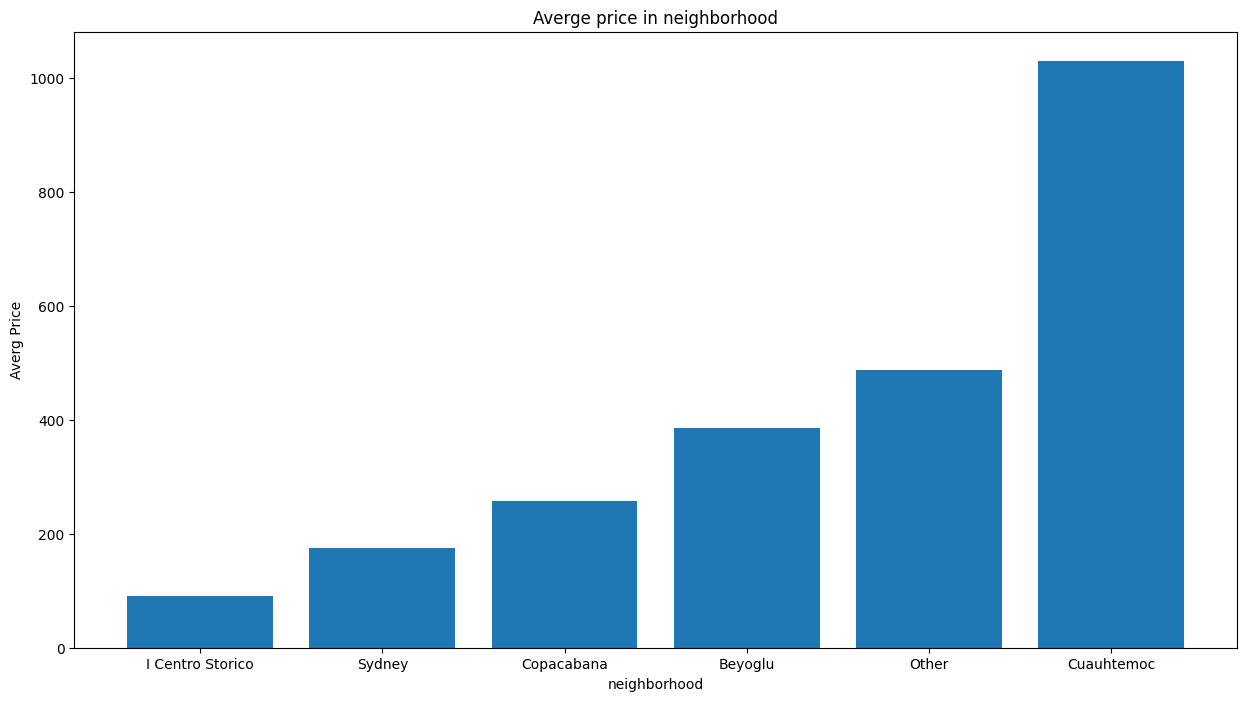

In [27]:
plt.figure(figsize=(15,8))
plt.bar(average_neighbourhood.index , average_neighbourhood.values )
plt.title('Averge price in neighborhood')
plt.xlabel('neighborhood', )
plt.ylabel('Averg Price')
plt.savefig('Averge price in neighborhood.png')

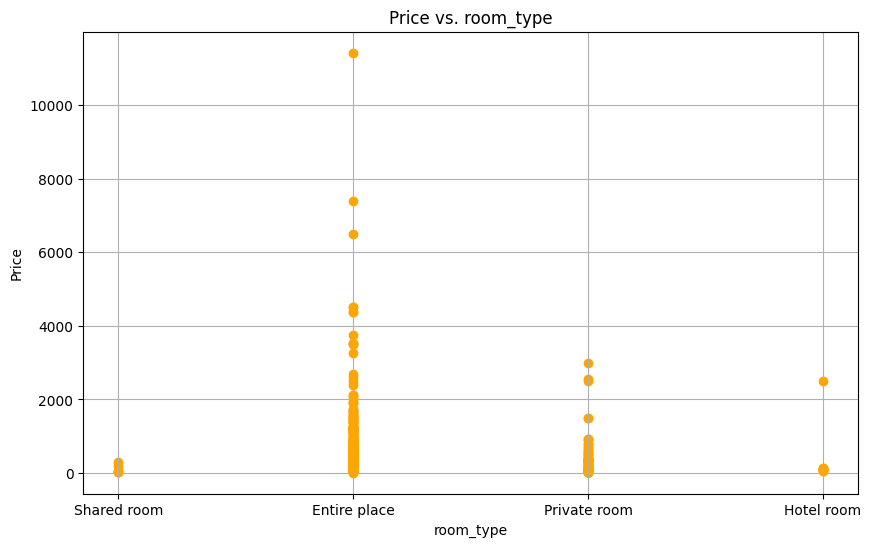

<Figure size 640x480 with 0 Axes>

In [28]:
# Price vs. room_type || Float vs. catogre

plt.figure(figsize=(10, 6))
plt.scatter(sample_df['room_type'], sample_df['price'], color='orange')
plt.title('Price vs. room_type')
plt.xlabel('room_type')
plt.ylabel('Price')
plt.grid(True)
plt.show()
plt.savefig('Price vs. room_type.png')

In [29]:
# Find the month(s) with the highest visit count
most_visited_months = monthly_visits[monthly_visits == monthly_visits.max()]

# Print the results (if there are multiple months with the same highest count)
if len(most_visited_months) > 1:
  months_list = most_visited_months.index.to_list()
  print(f"The most visited months are {', '.join(months_list)} with {most_visited_months.iloc[0]} visits each.")
else:
  most_visited_month = most_visited_months.index[0]
  print(f"The most visited month is {most_visited_month} with {most_visited_months.iloc[0]} visits.")

The most visited month is October with 552877 visits.


In [30]:
day_names = {
    1: "Sunday",
      2: "Monday",
      3: "Tuesday",
      4: "Wednesday",
      5: "Thursday",
      6: "Friday",
      7: "Saturday",
}
merged_df['day'] = pd.to_datetime(merged_df['date']).dt.day


In [31]:
# Further analysis for days within the most visited month(s)
for month in most_visited_months.index:
    # Filter data for the current month
    month_data = merged_df[merged_df['month'] == month]

    # Calculate day-wise visit counts
    day_visits = month_data['day'].value_counts()

    # Find the day(s) with the most visits in the current month
    most_visited_days = day_visits[day_visits == day_visits.max()]

    # Print results for most visited days within the current month
    if len(most_visited_days) > 1:
        days_list = [day_names[day] for day in most_visited_days.index.to_list()]
        print(f"  For {month}, the most visited days are {', '.join(days_list)} with {most_visited_days.iloc[0]} visits each.")
    else:
        most_visited_day = most_visited_days.index[0]
        print(f"  For {month}, the most visited day is {day_names[most_visited_day]} with {most_visited_days.iloc[0]} visits.")

  For October, the most visited day is Friday with 13286 visits.


In [32]:
merged_df['day_name'] = merged_df['day'].apply(lambda x: day_names.get(x, "Sunday"))


In [33]:
merged_df.shape

(3386529, 38)

In [34]:
merged_df

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,month,Top Property,Top neighbourhood,day,day_name
582,162163,329980859,2018-09-30,94026758,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,10.0,10.0,10.0,9.0,f,September,Entire apartment,Other,30,Sunday
583,162163,365234240,2019-01-01,97519756,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,10.0,10.0,10.0,9.0,f,January,Entire apartment,Other,1,Sunday
584,162163,444717066,2019-04-28,81491487,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,10.0,10.0,10.0,9.0,f,April,Entire apartment,Other,28,Sunday
585,162163,482904229,2019-07-07,246285395,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,10.0,10.0,10.0,9.0,f,July,Entire apartment,Other,7,Saturday
586,162163,274916628,2018-06-10,133689393,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,10.0,10.0,10.0,9.0,f,June,Entire apartment,Other,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516,appartamento silenzioso vicino centro commerciale,385086212,2021-01-18,IT,within a few hours,0.80,...,10.0,10.0,10.0,8.0,t,January,Entire apartment,Other,25,Sunday
5373139,47823964,727963021,2021-01-31,76411977,Futuristic rides in our world of home feelings,385460858,2021-01-21,"Rome, Lazio, Italy",a few days or more,0.33,...,2.0,2.0,2.0,2.0,f,January,Other,I Centro Storico,31,Sunday
5373140,47896175,728548625,2021-02-02,71370946,BBHOME Gazometro & Street art,340212816,2020-03-04,"Rome, Lazio, Italy",within an hour,1.00,...,10.0,10.0,10.0,6.0,t,February,Entire apartment,Other,2,Monday
5373141,47900451,727399287,2021-01-29,109011160,Trevi Diamond Lady Boutique,385074346,2021-01-18,IT,a few days or more,0.00,...,2.0,2.0,2.0,2.0,t,January,Entire apartment,I Centro Storico,29,Sunday


In [35]:
merged_df.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'month', 'Top Property', 'Top neighbourhood', 'day', 'day_name'],
      dtype='object')

In [36]:
# create a fcuntion to find and display NAs
def count_NAs(dfna, perc):
    NaList = []
    numOfRows = len(dfna)
    for i in dfna.columns:
        numOfNAs = dfna[i].isna().sum()
        print(f'{i:<30}, Rows: {numOfRows:>5}, NAs: {numOfNAs:<25}, precentage: {round(numOfNAs/numOfRows * 100.00,2)}')
        if ((numOfNAs/numOfRows) * 100.000) >= perc:
           NaList.append(i)
    print(f'columns with NAs over {perc}%: {NaList}')
    return NaList
# Display NAs
cutoff = 40
NAs = count_NAs(merged_df, cutoff)
print(f"Total with NAs over {cutoff}% column number :",len(NAs))

listing_id                    , Rows: 3386529, NAs: 0                        , precentage: 0.0
review_id                     , Rows: 3386529, NAs: 0                        , precentage: 0.0
date                          , Rows: 3386529, NAs: 0                        , precentage: 0.0
reviewer_id                   , Rows: 3386529, NAs: 0                        , precentage: 0.0
name                          , Rows: 3386529, NAs: 0                        , precentage: 0.0
host_id                       , Rows: 3386529, NAs: 0                        , precentage: 0.0
host_since                    , Rows: 3386529, NAs: 0                        , precentage: 0.0
host_location                 , Rows: 3386529, NAs: 0                        , precentage: 0.0
host_response_time            , Rows: 3386529, NAs: 0                        , precentage: 0.0
host_response_rate            , Rows: 3386529, NAs: 0                        , precentage: 0.0
host_acceptance_rate          , Rows: 3386529, NAs

In [37]:
merged_df.drop(NAs, axis = 1, inplace = True) # removing columns with NAs columns over 40%
#merged_df.drop(['latitude','longitude'],  axis = 1, inplace = True) # Dropping columns not useful for our analysis
merged_df.dropna(inplace=True) # Drop rows that contains NAs, Note that now its a relatively small number of rows since we dropped the columns with large percentage of Nulls
print(f"The length after dropping nas: {len(merged_df)}")

The length after dropping nas: 3386529


# **4.Feature Engineering:**

In [38]:
merged_df['property_type'].unique()

array(['Entire apartment', 'Private room in bed and breakfast',
       'Shared room in apartment', 'Entire townhouse',
       'Private room in house', 'Entire house', 'Entire loft',
       'Private room in apartment', 'Private room in guest suite', 'Boat',
       'Entire condominium', 'Private room in condominium',
       'Private room in nature lodge', 'Entire villa', 'Room in hotel',
       'Private room in guesthouse', 'Room in bed and breakfast',
       'Private room in townhouse', 'Room in boutique hotel',
       'Entire guesthouse', 'Entire serviced apartment',
       'Private room in serviced apartment', 'Room in aparthotel',
       'Room in hostel', 'Entire floor', 'Entire guest suite',
       'Shared room in loft', 'Private room in loft',
       'Private room in boat', 'Shared room in hostel', 'Private room',
       'Room in serviced apartment', 'Entire place',
       'Shared room in condominium', 'Tiny house',
       'Private room in villa', 'Houseboat', 'Dome house',
       

In [39]:
# Assuming you have your data loaded into a pandas DataFrame named 'data'

# One-Hot Encoding example (replace 'property_type' with your feature name)
types = ["Entire apartment", "Entire house", "Tiny house", "Entire townhouse", "Entire villa"]

# Filter the data
filtered_df = merged_df.loc[merged_df['property_type'].isin(types)]

# Apply one-hot encoding
property_type_dummies = pd.get_dummies(filtered_df['property_type'], prefix='Property_Type')

# Merge the new columns
merged_df = pd.concat([merged_df, property_type_dummies], axis=1)

# Label Encoding example (use cautiously, replace 'city' with your feature name)
merged_df['City_Label'] = merged_df['city'].astype('category').cat.codes

#You can encode other categorical features similarly


In [40]:
merged_df

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,Top Property,Top neighbourhood,day,day_name,Property_Type_Entire apartment,Property_Type_Entire house,Property_Type_Entire townhouse,Property_Type_Entire villa,Property_Type_Tiny house,City_Label
582,162163,329980859,2018-09-30,94026758,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,Entire apartment,Other,30,Sunday,True,False,False,False,False,6
583,162163,365234240,2019-01-01,97519756,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,Entire apartment,Other,1,Sunday,True,False,False,False,False,6
584,162163,444717066,2019-04-28,81491487,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,Entire apartment,Other,28,Sunday,True,False,False,False,False,6
585,162163,482904229,2019-07-07,246285395,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,Entire apartment,Other,7,Saturday,True,False,False,False,False,6
586,162163,274916628,2018-06-10,133689393,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,Entire apartment,Other,10,Sunday,True,False,False,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516,appartamento silenzioso vicino centro commerciale,385086212,2021-01-18,IT,within a few hours,0.80,...,Entire apartment,Other,25,Sunday,True,False,False,False,False,8
5373139,47823964,727963021,2021-01-31,76411977,Futuristic rides in our world of home feelings,385460858,2021-01-21,"Rome, Lazio, Italy",a few days or more,0.33,...,Other,I Centro Storico,31,Sunday,NaN,NaN,NaN,NaN,NaN,8
5373140,47896175,728548625,2021-02-02,71370946,BBHOME Gazometro & Street art,340212816,2020-03-04,"Rome, Lazio, Italy",within an hour,1.00,...,Entire apartment,Other,2,Monday,True,False,False,False,False,8
5373141,47900451,727399287,2021-01-29,109011160,Trevi Diamond Lady Boutique,385074346,2021-01-18,IT,a few days or more,0.00,...,Entire apartment,I Centro Storico,29,Sunday,True,False,False,False,False,8


In [41]:
merged_df['city'].value_counts()

city
Rome              721234
Paris             544166
New York          514467
Mexico City       401597
Sydney            280491
Rio de Janeiro    258191
Cape Town         221297
Bangkok           194523
Istanbul          159131
Hong Kong          91432
Name: count, dtype: int64

In [42]:
merged_df['City_Label'].value_counts()

City_Label
8    721234
6    544166
5    514467
4    401597
9    280491
7    258191
1    221297
0    194523
3    159131
2     91432
Name: count, dtype: int64

In [43]:
merged_df

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,Top Property,Top neighbourhood,day,day_name,Property_Type_Entire apartment,Property_Type_Entire house,Property_Type_Entire townhouse,Property_Type_Entire villa,Property_Type_Tiny house,City_Label
582,162163,329980859,2018-09-30,94026758,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,Entire apartment,Other,30,Sunday,True,False,False,False,False,6
583,162163,365234240,2019-01-01,97519756,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,Entire apartment,Other,1,Sunday,True,False,False,False,False,6
584,162163,444717066,2019-04-28,81491487,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,Entire apartment,Other,28,Sunday,True,False,False,False,False,6
585,162163,482904229,2019-07-07,246285395,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,Entire apartment,Other,7,Saturday,True,False,False,False,False,6
586,162163,274916628,2018-06-10,133689393,Brand new Modern flat Central Paris Boutique H...,775000,2011-07-04,"Paris, Ile-de-France, France",within an hour,1.00,...,Entire apartment,Other,10,Sunday,True,False,False,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516,appartamento silenzioso vicino centro commerciale,385086212,2021-01-18,IT,within a few hours,0.80,...,Entire apartment,Other,25,Sunday,True,False,False,False,False,8
5373139,47823964,727963021,2021-01-31,76411977,Futuristic rides in our world of home feelings,385460858,2021-01-21,"Rome, Lazio, Italy",a few days or more,0.33,...,Other,I Centro Storico,31,Sunday,NaN,NaN,NaN,NaN,NaN,8
5373140,47896175,728548625,2021-02-02,71370946,BBHOME Gazometro & Street art,340212816,2020-03-04,"Rome, Lazio, Italy",within an hour,1.00,...,Entire apartment,Other,2,Monday,True,False,False,False,False,8
5373141,47900451,727399287,2021-01-29,109011160,Trevi Diamond Lady Boutique,385074346,2021-01-18,IT,a few days or more,0.00,...,Entire apartment,I Centro Storico,29,Sunday,True,False,False,False,False,8


In [44]:
merged_df.shape

(3386529, 44)